# Import Libaries

In [1]:
import re
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords


nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/farraseo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/farraseo/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/farraseo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Load Data

In [2]:
data = pd.read_csv('iphone_clean.csv')
data

,productAsin,country,date,isVerified,ratingScore,reviewTitle,reviewDescription,reviewUrl,reviewedIn,variant,variantAsin,productVariant,productType
0,B09G9BL5CP,India,11-08-2024,True,4,No charger,"Every thing is good about iPhones, there's not...",https://www.amazon.in/gp/customer-reviews/R345...,Reviewed in India on 11 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,Apple Iphone 13 (256 GB) - Midnight,Apple Iphone 13
1,B09G9BL5CP,India,16-08-2024,True,5,iPhone 13 256GB,"It look so fabulous, I am android user switche...",https://www.amazon.in/gp/customer-reviews/R2HJ...,Reviewed in India on 16 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,Apple Iphone 13 (256 GB) - Midnight,Apple Iphone 13
2,B09G9BL5CP,India,14-05-2024,True,4,Flip camera option nill,I tried to flip camera while recording but no ...,https://www.amazon.in/gp/customer-reviews/R3Y7...,Reviewed in India on 14 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,Apple Iphone 13 (256 GB) - Midnight,Apple Iphone 13
3,B09G9BL5CP,India,24-06-2024,True,5,Product,100% genuine,https://www.amazon.in/gp/customer-reviews/R1P9...,Reviewed in India on 24 June 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,Apple Iphone 13 (256 GB) - Midnight,Apple Iphone 13
4,B09G9BL5CP,India,18-05-2024,True,5,Good product,Happy to get the iPhone 13 in Amazon offer,https://www.amazon.in/gp/customer-reviews/R1XI...,Reviewed in India on 18 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,Apple Iphone 13 (256 GB) - Midnight,Apple Iphone 13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2955,B09G9D8KRQ,India,11-10-2023,True,1,Very bad experience with i phone 13,Useless phon never buy this heat n useless cam...,https://www.amazon.in/gp/customer-reviews/R10O...,Reviewed in India on 11 October 2023,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N,Apple Iphone 13 (128 GB) - Red,Apple Iphone 13
2956,B09G9D8KRQ,India,14-10-2022,True,2,not happy with this apple product,iam not happy with this product why because ch...,https://www.amazon.in/gp/customer-reviews/R2FW...,Reviewed in India on 14 October 2022,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N,Apple Iphone 13 (128 GB) - Red,Apple Iphone 13
2957,B09G9D8KRQ,India,24-02-2022,True,3,Good phone,Good phone,https://www.amazon.in/gp/customer-reviews/R2C7...,Reviewed in India on 24 February 2022,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N,Apple Iphone 13 (128 GB) - Red,Apple Iphone 13
2958,B09G9D8KRQ,India,16-10-2023,True,1,Battery discharge,While charging mobile it's getting so hot even...,https://www.amazon.in/gp/customer-reviews/R3K0...,Reviewed in India on 16 October 2023,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N,Apple Iphone 13 (128 GB) - Red,Apple Iphone 13


In [3]:
# Daftar stopwords
stop_words_en = set(stopwords.words("english"))
stop_words_en.add('phone')
stop_words_en.add('iphone')
stop_words_en.add('got')
stop_words_en.add('one')
stop_words_en.add('use')
stop_words_en.add('events')
stop_words_en.add('even')
stop_words_en.add('get')
stop_words_en.add('amazon')
stop_words_en.add('also')
stop_words_en.add('using')
stop_words_en.add('product')
stop_words_en.add('came')

# Fungsi untuk membersihkan teks satu per satu
def clean_single_review(text):
    if pd.isnull(text):
        return ""
    text = re.sub(r"#[A-Za-z0-9]+", " ", text)
    text = re.sub(r"[^a-zA-Z\s]", " ", text)
    text = text.lower().strip()
    filtered_words = [word for word in text.split() if word not in stop_words_en]
    return " ".join(filtered_words)

# Terapkan fungsi ke setiap baris di kolom reviewDescription
data['reviewDescription_cleaned'] = data['reviewDescription'].apply(clean_single_review)

In [4]:
data.to_csv('iphone_review_cleaned.csv', index=False)

In [5]:
df = pd.read_csv("iphone_review_cleaned.csv")
df

,productAsin,country,date,isVerified,ratingScore,reviewTitle,reviewDescription,reviewUrl,reviewedIn,variant,variantAsin,productVariant,productType,reviewDescription_cleaned
0,B09G9BL5CP,India,11-08-2024,True,4,No charger,"Every thing is good about iPhones, there's not...",https://www.amazon.in/gp/customer-reviews/R345...,Reviewed in India on 11 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,Apple Iphone 13 (256 GB) - Midnight,Apple Iphone 13,every thing good iphones nothing compared spee...
1,B09G9BL5CP,India,16-08-2024,True,5,iPhone 13 256GB,"It look so fabulous, I am android user switche...",https://www.amazon.in/gp/customer-reviews/R2HJ...,Reviewed in India on 16 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,Apple Iphone 13 (256 GB) - Midnight,Apple Iphone 13,look fabulous android user switched apple perf...
2,B09G9BL5CP,India,14-05-2024,True,4,Flip camera option nill,I tried to flip camera while recording but no ...,https://www.amazon.in/gp/customer-reviews/R3Y7...,Reviewed in India on 14 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,Apple Iphone 13 (256 GB) - Midnight,Apple Iphone 13,tried flip camera recording facility added pau...
3,B09G9BL5CP,India,24-06-2024,True,5,Product,100% genuine,https://www.amazon.in/gp/customer-reviews/R1P9...,Reviewed in India on 24 June 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,Apple Iphone 13 (256 GB) - Midnight,Apple Iphone 13,genuine
4,B09G9BL5CP,India,18-05-2024,True,5,Good product,Happy to get the iPhone 13 in Amazon offer,https://www.amazon.in/gp/customer-reviews/R1XI...,Reviewed in India on 18 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,Apple Iphone 13 (256 GB) - Midnight,Apple Iphone 13,happy offer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2955,B09G9D8KRQ,India,11-10-2023,True,1,Very bad experience with i phone 13,Useless phon never buy this heat n useless cam...,https://www.amazon.in/gp/customer-reviews/R10O...,Reviewed in India on 11 October 2023,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N,Apple Iphone 13 (128 GB) - Red,Apple Iphone 13,useless phon never buy heat n useless camera p...
2956,B09G9D8KRQ,India,14-10-2022,True,2,not happy with this apple product,iam not happy with this product why because ch...,https://www.amazon.in/gp/customer-reviews/R2FW...,Reviewed in India on 14 October 2022,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N,Apple Iphone 13 (128 GB) - Red,Apple Iphone 13,iam happy charger provided apple extra burden ...
2957,B09G9D8KRQ,India,24-02-2022,True,3,Good phone,Good phone,https://www.amazon.in/gp/customer-reviews/R2C7...,Reviewed in India on 24 February 2022,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N,Apple Iphone 13 (128 GB) - Red,Apple Iphone 13,good
2958,B09G9D8KRQ,India,16-10-2023,True,1,Battery discharge,While charging mobile it's getting so hot even...,https://www.amazon.in/gp/customer-reviews/R3K0...,Reviewed in India on 16 October 2023,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N,Apple Iphone 13 (128 GB) - Red,Apple Iphone 13,charging mobile getting hot mobile much heated


# Explore Data Analysis 

## Top 20 Words - iPhone 15

In [6]:
def plot_wordcloud(df, product_type_col='productType', text_col='reviewDescription_cleaned', target_type=None):

    if target_type is None:
        print("Harap masukkan nama productType.")
        return
    
    text_data = " ".join(df[df[product_type_col] == target_type][text_col].dropna().astype(str))
    if not text_data:
        print(f"Tidak ada data untuk {target_type}")
        return

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"WordCloud - {target_type}")
    plt.show()


def plot_top20_words(df, product_type_col='productType', text_col='reviewDescription_cleaned', target_type=None):
    if target_type is None:
        print("Harap masukkan nama productType.")
        return

    text_data = " ".join(df[df[product_type_col] == target_type][text_col].dropna().astype(str))
    if not text_data:
        print(f"Tidak ada data untuk {target_type}")
        return

    word_counts = Counter(text_data.split())
    top_20 = word_counts.most_common(20)
    
    if not top_20:
        print(f"Tidak ada cukup kata untuk {target_type}")
        return

    words, counts = zip(*top_20)

    plt.figure(figsize=(12, 6))
    bars = plt.bar(words, counts)

    plt.xticks(rotation=45)
    plt.title(f"Top 20 Words - {target_type}")
    plt.ylabel("Frequency")
    plt.xlabel("Words")

    # Tambahkan anotasi frekuensi di atas masing-masing bar
    for bar in bars:
        height = bar.get_height()
        plt.annotate(
            f'{height}',  # atau f'{int(height)}' jika ingin angka bulat
            xy=(bar.get_x() + bar.get_width() / 2, height),
            xytext=(0, 3),
            textcoords="offset points",
            ha='center',
            va='bottom'
        )

    plt.tight_layout()
    plt.show()

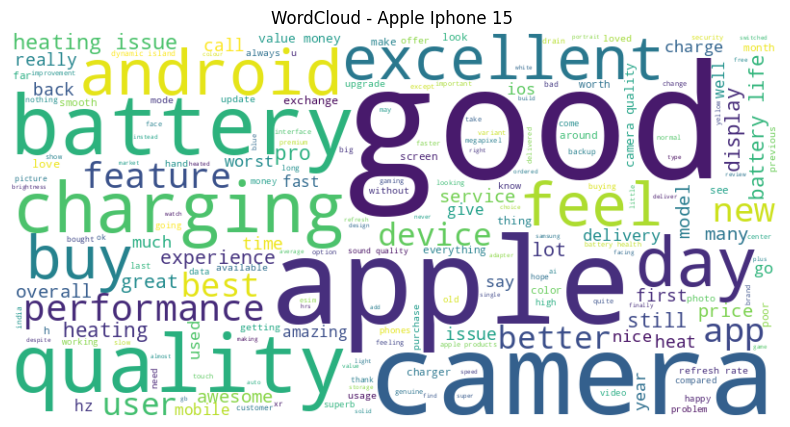

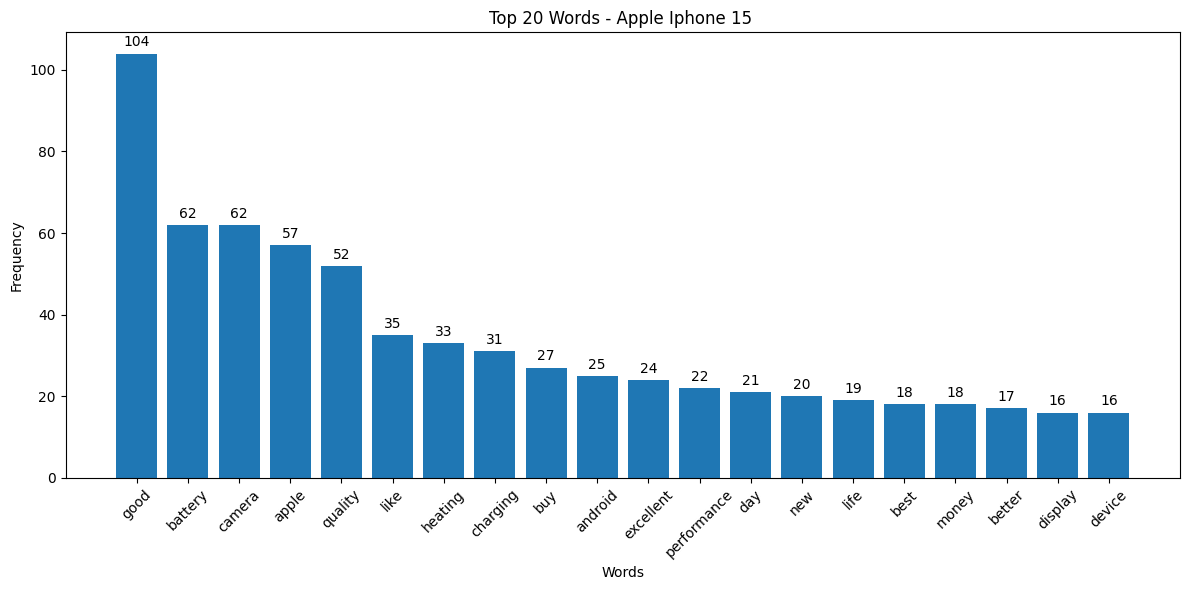

In [7]:
#iphone 15
plot_wordcloud(df, target_type="Apple Iphone 15 ")
plot_top20_words(df, target_type="Apple Iphone 15 ")

### 1. good

In [8]:
filtered_good = df[
    (df["productType"].str.contains("Apple Iphone 15", case=False, na=False)) &
    (df["reviewDescription_cleaned"].str.contains(r"\bgood\b", case=False, na=False))
]

filtered_good[["productType", "reviewDescription_cleaned"]]

,productType,reviewDescription_cleaned
804,Apple Iphone 15,sound quality good performance good transfer d...
810,Apple Iphone 15,like big sized go day battery life average cam...
812,Apple Iphone 15,switching good choice guess better camera lens...
813,Apple Iphone 15,good battery really goodperformance goodand ge...
819,Apple Iphone 15,made titanium seems good right build quite wor...
...,...,...
1031,Apple Iphone 15,worth expected delivered within day good packing
1034,Apple Iphone 15,heats camera good daylight night photos pathet...
1038,Apple Iphone 15,good almost k less flipcart makes feel bit sad
1046,Apple Iphone 15,everyone know pros let talk consbattery worst ...


Dari tabel di atas, review yang mengandung kata 'good' diikuti dengan 'camera, battery, quality, performance' atau kinerja dari fitur yang ada pada produk tersebut yang mengindikasikan sentimen positif.

### 2. like

In [9]:
filtered_like = df[
    (df["productType"].str.contains("Apple Iphone 15", case=False, na=False)) &
    (df["reviewDescription_cleaned"].str.contains(r"\blike\b", case=False, na=False))
]

filtered_like[["productType", "reviewDescription_cleaned"]]

,productType,reviewDescription_cleaned
810,Apple Iphone 15,like big sized go day battery life average cam...
813,Apple Iphone 15,good battery really goodperformance goodand ge...
816,Apple Iphone 15,like
818,Apple Iphone 15,upgraded year se massive upgrade lots quality ...
823,Apple Iphone 15,like iphones new features
827,Apple Iphone 15,hand assembled india like dream come true
836,Apple Iphone 15,like camera photos photographer know ki camera...
842,Apple Iphone 15,like value money
856,Apple Iphone 15,like
863,Apple Iphone 15,love everything like color touch back side qua...


Dari tabel di atas, review yang mengandung kata 'like' mendeskripsikan bahwa bagaimana user menyukai produk tersebut yang mengindikasikan sentimen positif.

### 3. heating

In [10]:
filtered_heating = df[
    (df["productType"].str.contains("Apple Iphone 15", case=False, na=False)) &
    (df["reviewDescription_cleaned"].str.contains(r"\bheating\b", case=False, na=False))
]

filtered_heating[["productType", "reviewDescription_cleaned"]]

,productType,reviewDescription_cleaned
811,Apple Iphone 15,overall beast specially terms battery camera i...
813,Apple Iphone 15,good battery really goodperformance goodand ge...
817,Apple Iphone 15,heating issues update
833,Apple Iphone 15,performance great battery good heating issues ...
864,Apple Iphone 15,hi ordered new received yesterday heating lot ...
866,Apple Iphone 15,upgrading good full day battery normal users w...
867,Apple Iphone 15,facing heating issue taking photos videos minu...
874,Apple Iphone 15,heating issues
884,Apple Iphone 15,working well month usage heating issuesdynamic...
887,Apple Iphone 15,quality bad heating heating service centre giv...


Dari tabel di atas, review yang mengandung kata 'heating' mendeskripsikan kekurangan produk seperti 'heating issues' yang mengindikasikan sentimen negatif.

### 4. buy

In [11]:
filtered_buy = df[
    (df["productType"].str.contains("Apple Iphone 15", case=False, na=False)) &
    (df["reviewDescription_cleaned"].str.contains(r"\bbuy\b", case=False, na=False))
]

filtered_buy[["productType", "reviewDescription_cleaned"]]

,productType,reviewDescription_cleaned
829,Apple Iphone 15,nice buy
835,Apple Iphone 15,battery draining hrs charging consumes min hrs...
837,Apple Iphone 15,coming switzerland hard buy right booked daugh...
849,Apple Iphone 15,worst ever seen hate hate lot buy
873,Apple Iphone 15,starting hesitating buy much costly android us...
876,Apple Iphone 15,wonderful good features worth buy
881,Apple Iphone 15,switched honesty feel difference feels like ho...
883,Apple Iphone 15,first last mistake choosing iphoneyou cannot r...
885,Apple Iphone 15,camera quality superb good buy budget friendly...
901,Apple Iphone 15,could great turned absolute mockery year old s...


Dari tabel di atas, review yang mengandung kata 'buy' mendeskripsikan ketidakpuasan user dalam membeli produk yang mengindikasikan sentimen negatif.

### 5. day

In [12]:
filtered_day = df[
    (df["productType"].str.contains("Apple Iphone 15", case=False, na=False)) &
    (df["reviewDescription_cleaned"].str.contains(r"\bday\b", case=False, na=False))
]

filtered_day[["productType", "reviewDescription_cleaned"]]

,productType,reviewDescription_cleaned
810,Apple Iphone 15,like big sized go day battery life average cam...
822,Apple Iphone 15,good display peak brightness good good visibil...
850,Apple Iphone 15,designone noticeable changes new design rounde...
866,Apple Iphone 15,upgrading good full day battery normal users w...
867,Apple Iphone 15,facing heating issue taking photos videos minu...
872,Apple Iphone 15,delivered day indian version sbi promo work me...
900,Apple Iphone 15,two days found first android way better comes ...
914,Apple Iphone 15,first looks prime quality nicely fit hands and...
915,Apple Iphone 15,running smoothly problem camera good battery l...
917,Apple Iphone 15,made transition pov first month usepros batter...


Dari tabel di atas, review yang mengandung kata 'day' mendeskripsikan kepuasan user dalam membeli produk pada fitur-fitur nya dan pengalaman baik user menggunakan produk yang mengindikasikan sentimen positif.

### 6. new

In [13]:
filtered_new = df[
    (df["productType"].str.contains("Apple Iphone 15", case=False, na=False)) &
    (df["reviewDescription_cleaned"].str.contains(r"\bnew\b", case=False, na=False))
]

filtered_new[["productType", "reviewDescription_cleaned"]]

,productType,reviewDescription_cleaned
811,Apple Iphone 15,overall beast specially terms battery camera i...
818,Apple Iphone 15,upgraded year se massive upgrade lots quality ...
823,Apple Iphone 15,like iphones new features
850,Apple Iphone 15,designone noticeable changes new design rounde...
864,Apple Iphone 15,hi ordered new received yesterday heating lot ...
901,Apple Iphone 15,could great turned absolute mockery year old s...
952,Apple Iphone 15,interesting experience new model corners notic...
964,Apple Iphone 15,come new package like hope new
989,Apple Iphone 15,received defective deep hairline crack screen ...
994,Apple Iphone 15,brought apple hope good spending heavy money g...


Dari tabel di atas, review yang mengandung kata 'new' mendeskripsikan kelebihan produk pada saat menggunakannya yang mengindikasikan sentimen positif.

### 8. life

In [14]:
filtered_life = df[
    (df["productType"].str.contains("Apple Iphone 15", case=False, na=False)) &
    (df["reviewDescription_cleaned"].str.contains(r"\blife\b", case=False, na=False))
]

filtered_life[["productType", "reviewDescription_cleaned"]]

,productType,reviewDescription_cleaned
810,Apple Iphone 15,like big sized go day battery life average cam...
818,Apple Iphone 15,upgraded year se massive upgrade lots quality ...
850,Apple Iphone 15,designone noticeable changes new design rounde...
866,Apple Iphone 15,upgrading good full day battery normal users w...
881,Apple Iphone 15,switched honesty feel difference feels like ho...
886,Apple Iphone 15,amazing camera quality obviously surpasses iph...
892,Apple Iphone 15,heats lot basic tasks like scrolling websites ...
903,Apple Iphone 15,dianamic island makes special price island mak...
914,Apple Iphone 15,first looks prime quality nicely fit hands and...
915,Apple Iphone 15,running smoothly problem camera good battery l...


Dari tabel di atas, review yang mengandung kata 'life' mendeskripsikan kelebihan fitur produk (battery) pada saat user menggunakan produk yang mengindikasikan sentimen positif.

### 9. best

In [15]:
filtered_best = df[
    (df["productType"].str.contains("Apple Iphone 15", case=False, na=False)) &
    (df["reviewDescription_cleaned"].str.contains(r"\bbest\b", case=False, na=False))
]

filtered_best[["productType", "reviewDescription_cleaned"]]

,productType,reviewDescription_cleaned
806,Apple Iphone 15,best smart based personal preference available...
810,Apple Iphone 15,like big sized go day battery life average cam...
818,Apple Iphone 15,upgraded year se massive upgrade lots quality ...
848,Apple Iphone 15,recently acquired apple stunning yellow color ...
852,Apple Iphone 15,gift th bday would expect ofc best class best ...
886,Apple Iphone 15,amazing camera quality obviously surpasses iph...
946,Apple Iphone 15,performance best battery backup good watt fast...
957,Apple Iphone 15,best price
969,Apple Iphone 15,found best apples forest nice
978,Apple Iphone 15,pretty decent proud finishing best super camer...


Dari tabel di atas, review yang mengandung kata 'best' mendeskripsikan kepuasan user dalam membeli produk secara keseluruhan maupun fitur-fiturnya yang mengindikasikan sentimen positif.

### 10. money

In [16]:
filtered_money = df[
    (df["productType"].str.contains("Apple Iphone 15", case=False, na=False)) &
    (df["reviewDescription_cleaned"].str.contains(r"\bmoney\b", case=False, na=False))
]

filtered_money[["productType", "reviewDescription_cleaned"]]

,productType,reviewDescription_cleaned
842,Apple Iphone 15,like value money
853,Apple Iphone 15,good handy make sense x looks similar refresh ...
870,Apple Iphone 15,value money better quality
898,Apple Iphone 15,awesome awesome features specifically love pho...
901,Apple Iphone 15,could great turned absolute mockery year old s...
912,Apple Iphone 15,paying lots money apple apple gets heats like ...
918,Apple Iphone 15,apple quite costly quite good interface operat...
928,Apple Iphone 15,working friendly apps truecaller call recordin...
930,Apple Iphone 15,value money performance
940,Apple Iphone 15,awesome value money


Dari tabel di atas, review yang mengandung kata 'money' mendeskripsikan harga produk yang mahal namun kualitas produk tidak sebanding dengan harganya mengindikasikan sentimen negatif.

### 11. better

In [17]:
filtered_better = df[
    (df["productType"].str.contains("Apple Iphone 15", case=False, na=False)) &
    (df["reviewDescription_cleaned"].str.contains(r"\bbetter\b", case=False, na=False))
]

filtered_better[["productType", "reviewDescription_cleaned"]]

,productType,reviewDescription_cleaned
809,Apple Iphone 15,everything better except cell reception way worse
812,Apple Iphone 15,switching good choice guess better camera lens...
843,Apple Iphone 15,first experience better android draw back drai...
850,Apple Iphone 15,designone noticeable changes new design rounde...
870,Apple Iphone 15,value money better quality
875,Apple Iphone 15,go without doubt instead pro previous ones cam...
894,Apple Iphone 15,worst quality refresh rate goodfull heating ch...
898,Apple Iphone 15,awesome awesome features specifically love pho...
900,Apple Iphone 15,two days found first android way better comes ...
951,Apple Iphone 15,light weight battery better working


Dari tabel di atas, review yang mengandung kata 'better' menunjukkan bahwa pengguna membandingkan produk Apple dengan merek lain, dan menilai produk Apple kurang baik, sehingga mengindikasikan sentimen negatif.

### 12. display

In [18]:
filtered_display = df[
    (df["productType"].str.contains("Apple Iphone 15", case=False, na=False)) &
    (df["reviewDescription_cleaned"].str.contains(r"\bdisplay\b", case=False, na=False))
]

filtered_display[["productType", "reviewDescription_cleaned"]]

,productType,reviewDescription_cleaned
811,Apple Iphone 15,overall beast specially terms battery camera i...
822,Apple Iphone 15,good display peak brightness good good visibil...
841,Apple Iphone 15,overall good specially long lasting battery im...
850,Apple Iphone 15,designone noticeable changes new design rounde...
875,Apple Iphone 15,go without doubt instead pro previous ones cam...
877,Apple Iphone 15,poor quality except camera display worse onepl...
886,Apple Iphone 15,amazing camera quality obviously surpasses iph...
939,Apple Iphone 15,preordered sure condition great work budget k ...
949,Apple Iphone 15,display impressively bright despite hz thought...
978,Apple Iphone 15,pretty decent proud finishing best super camer...


Dari tabel di atas, review yang mengandung kata 'display' mendeskripsikan bagaimana kelebihan kualitas tampilan layar pada produk ini bagus mengindikasikan sentimen positif.

## Top 20 Words - Overall

In [19]:
def plot_overall_word_analysis(df, text_col='reviewDescription_cleaned'):
    # Gabungkan semua review
    overall_text = " ".join(df[text_col].dropna().astype(str))
    
    if not overall_text:
        print("Tidak ada data review untuk semua productType.")
        return

    # WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(overall_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("WordCloud - Overall All ProductTypes")
    plt.show()

    # Top 20 Words
    overall_word_counts = Counter(overall_text.split())
    overall_top_20 = overall_word_counts.most_common(20)

    if not overall_top_20:
        print("Tidak ada cukup kata untuk ditampilkan.")
        return

    words, counts = zip(*overall_top_20)

    plt.figure(figsize=(12, 6))
    bars = plt.bar(words, counts)

    plt.xticks(rotation=45)
    plt.title("Top 20 Words - Overall All ProductTypes")
    plt.ylabel("Frequency")
    plt.xlabel("Words")

    # Tambahkan anotasi
    for bar in bars:
        height = bar.get_height()
        plt.annotate(
            f'{height}',
            xy=(bar.get_x() + bar.get_width() / 2, height),
            xytext=(0, 3),
            textcoords="offset points",
            ha='center',
            va='bottom'
        )

    plt.tight_layout()
    plt.show()

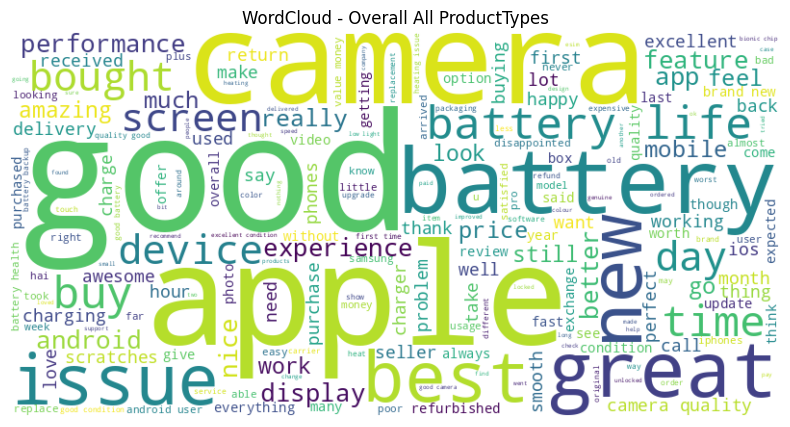

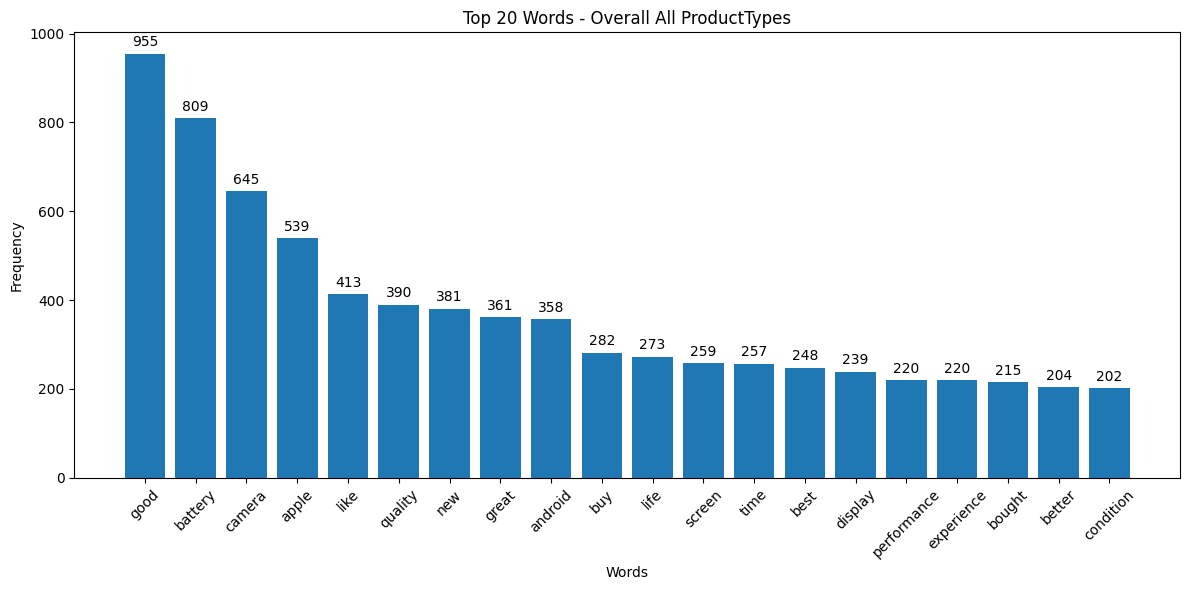

In [20]:
plot_overall_word_analysis(df)

### 1. good

In [21]:
filtered_good_overall = df[
    df["reviewDescription_cleaned"].str.contains(r"\bgood\b", case=False, na=False)
]

filtered_good_overall[["productType", "reviewDescription_cleaned"]]

,productType,reviewDescription_cleaned
0,Apple Iphone 13,every thing good iphones nothing compared spee...
7,Apple Iphone 13,good
10,Apple Iphone 13,honest review going broke buying depreciating ...
12,Apple Iphone 13,perfect highly recommend seller great price sa...
13,Apple Iphone 13,like quite reasonable comparing iphones good nice
...,...,...
2935,Apple Iphone 13,apart good camera things easy
2939,Apple Iphone 13,good apple running big scam offering extra exc...
2944,Apple Iphone 13,overall good somewhere price sucks realise cha...
2947,Apple Iphone 13,ki packing good nhi thi ok delivery boy ka beh...


Dari tabel di atas, review yang mengandung kata 'good' mendeskripsikan bagaimana kepuasan user pada produk yang mengindikasikan sentimen positif.

### 2. like

In [22]:
filtered_like_overall = df[
    df["reviewDescription_cleaned"].str.contains(r"\blike\b", case=False, na=False)
]

filtered_like_overall[["productType", "reviewDescription_cleaned"]]

,productType,reviewDescription_cleaned
1,Apple Iphone 13,look fabulous android user switched apple perf...
10,Apple Iphone 13,honest review going broke buying depreciating ...
13,Apple Iphone 13,like quite reasonable comparing iphones good nice
16,Apple Iphone 13,works fine nothing special camera good night e...
25,Apple Iphone 13,good like android
...,...,...
2873,Apple Iphone 13,biggest improvement noted battery life really ...
2892,Apple Iphone 13,apple increase performance device say garbage ...
2899,Apple Iphone 13,great love android apple different characters ...
2915,Apple Iphone 13,like


Dari tabel di atas, review yang mengandung kata 'like' mendeskripsikan bagaimana pengalaman baik user pada produk yang diikuti dengan pengalaman pada produk sebelumnya (android/model iphone sebelumnya) yang mengindikasikan sentimen positif.

### 3. new

In [23]:
filtered_new_overall = df[
    df["reviewDescription_cleaned"].str.contains(r"\bnew\b", case=False, na=False)
]

filtered_new_overall[["productType", "reviewDescription_cleaned"]]

,productType,reviewDescription_cleaned
22,Apple Iphone 13,nothing new features model changed
23,Apple Iphone 13,seals teared stricker put know whether new ref...
50,Apple Iphone 13,new purchased developing overheating charging ...
51,Apple Iphone 13,without doubt game changer avid apple user rec...
74,Apple Iphone 13,gb surpassed expectations every aspect setting...
...,...,...
2840,Apple Iphone 13,almot month running smooth new network issues ...
2850,Apple Iphone 13,want hear reading review means already done en...
2869,Apple Iphone 13,stellar device excels various aspects making t...
2946,Apple Iphone 13,brand new overheating lot charging video calls...


Dari tabel di atas, review yang mengandung kata 'new' mendeskripsikan kualitas produk yang baru dibeli memberikan kepuasan kepada user yang mengindikasikan sentimen positif.

### 4. great

In [24]:
filtered_great_overall = df[
    df["reviewDescription_cleaned"].str.contains(r"\bgreat\b", case=False, na=False)
]

filtered_great_overall[["productType", "reviewDescription_cleaned"]]

,productType,reviewDescription_cleaned
6,Apple Iphone 13,great nothing say name apple identity well rec...
10,Apple Iphone 13,honest review going broke buying depreciating ...
12,Apple Iphone 13,perfect highly recommend seller great price sa...
24,Apple Iphone 13,well balanced hd oled sdisplay colours accurat...
36,Apple Iphone 13,received timely working great improved lifesty...
...,...,...
2869,Apple Iphone 13,stellar device excels various aspects making t...
2899,Apple Iphone 13,great love android apple different characters ...
2907,Apple Iphone 13,tracking comparing battery performance mobile ...
2912,Apple Iphone 13,great buy


Dari tabel di atas, review yang mengandung kata 'great' mendeskripsikan kepuasan kepada user yang mengindikasikan sentimen positif.

### 5. buy

In [25]:
filtered_buy_overall = df[
    df["reviewDescription_cleaned"].str.contains(r"\bbuy\b", case=False, na=False)
]

filtered_buy_overall[["productType", "reviewDescription_cleaned"]]

,productType,reviewDescription_cleaned
10,Apple Iphone 13,honest review going broke buying depreciating ...
27,Apple Iphone 13,actually android user switched user experience...
43,Apple Iphone 13,ios current version updated thw worst thing io...
87,Apple Iphone 13,great buy
92,Apple Iphone 13,great buy
...,...,...
2938,Apple Iphone 13,bought within months display stopped working s...
2940,Apple Iphone 13,buy device getting high heat
2944,Apple Iphone 13,overall good somewhere price sucks realise cha...
2946,Apple Iphone 13,brand new overheating lot charging video calls...


Dari tabel di atas, review yang mengandung kata 'buy' mendeskripsikan kekurangan produk dan ketidakpuasan user dalam membeli produk tersebut yang mengindikasikan sentimen negatif.

### 6. life

In [26]:
filtered_life_overall = df[
    df["reviewDescription_cleaned"].str.contains(r"\blife\b", case=False, na=False)
]

filtered_life_overall[["productType", "reviewDescription_cleaned"]]

,productType,reviewDescription_cleaned
10,Apple Iphone 13,honest review going broke buying depreciating ...
18,Apple Iphone 13,day delivery delivered days purchase thrice th...
38,Apple Iphone 13,finally upgraded trusty let tell feels like ti...
40,Apple Iphone 13,things liked solid build quality polished soft...
46,Apple Iphone 13,writing review months pros camera clicks amazi...
...,...,...
2869,Apple Iphone 13,stellar device excels various aspects making t...
2873,Apple Iphone 13,biggest improvement noted battery life really ...
2875,Apple Iphone 13,nice good range good iphones battery life conc...
2881,Apple Iphone 13,ordered apple gb getting shows abnormal batter...


Dari tabel di atas, review yang mengandung kata 'life' mendeskripsikan kelebihan fitur produk (battery) pada saat user menggunakan produk yang mengindikasikan sentimen positif.

### 7. best

In [27]:
filtered_best_overall = df[
    df["reviewDescription_cleaned"].str.contains(r"\bbest\b", case=False, na=False)
]

filtered_best_overall[["productType", "reviewDescription_cleaned"]]

,productType,reviewDescription_cleaned
20,Apple Iphone 13,best
39,Apple Iphone 13,really wanted first loved sound quality great ...
40,Apple Iphone 13,things liked solid build quality polished soft...
44,Apple Iphone 13,almost months issue facing camera quality grea...
46,Apple Iphone 13,writing review months pros camera clicks amazi...
...,...,...
2876,Apple Iphone 13,best buy price give things premium choice know ok
2901,Apple Iphone 13,hope good best
2911,Apple Iphone 13,best k
2924,Apple Iphone 13,loved delivery bcz always best apple


Dari tabel di atas, review yang mengandung kata 'best' mendeskripsikan kepuasan user dalam membeli produk secara keseluruhan (kualitas dan budget cocok untuk user) maupun fitur-fiturnya yang mengindikasikan sentimen positif.

### 8. display

In [28]:
filtered_display_overall = df[
    df["reviewDescription_cleaned"].str.contains(r"\bdisplay\b", case=False, na=False)
]

filtered_display_overall[["productType", "reviewDescription_cleaned"]]

,productType,reviewDescription_cleaned
10,Apple Iphone 13,honest review going broke buying depreciating ...
27,Apple Iphone 13,actually android user switched user experience...
38,Apple Iphone 13,finally upgraded trusty let tell feels like ti...
39,Apple Iphone 13,really wanted first loved sound quality great ...
43,Apple Iphone 13,ios current version updated thw worst thing io...
...,...,...
2880,Apple Iphone 13,display flickering time ringtone change playin...
2910,Apple Iphone 13,first time user confused buy though price diff...
2938,Apple Iphone 13,bought within months display stopped working s...
2945,Apple Iphone 13,year green line display problem


Dari tabel di atas, review yang mengandung kata 'display' mendeskripsikan bagaimana kualitas tampilan layar pada produk ini bagus mengindikasikan sentimen positif.

### 9. experience

In [29]:
filtered_experience_overall = df[
    df["reviewDescription_cleaned"].str.contains(r"\bexperience\b", case=False, na=False)
]

filtered_experience_overall[["productType", "reviewDescription_cleaned"]]

,productType,reviewDescription_cleaned
24,Apple Iphone 13,well balanced hd oled sdisplay colours accurat...
27,Apple Iphone 13,actually android user switched user experience...
43,Apple Iphone 13,ios current version updated thw worst thing io...
44,Apple Iphone 13,almost months issue facing camera quality grea...
49,Apple Iphone 13,finally switched android hand feel super amazi...
...,...,...
2869,Apple Iphone 13,stellar device excels various aspects making t...
2888,Apple Iphone 13,recently purchased days facing charging issue ...
2895,Apple Iphone 13,stopped working within month giving nice batte...
2900,Apple Iphone 13,suddenly hang call cut call worst experience v...


Dari tabel di atas, review yang mengandung kata 'experience' mendeskripsikan bagaimana perasaan user menggunakan produk dengan (luar biasa, menakjubkan) yang mengindikasikan sentimen positif.

### 10. better

In [30]:
filtered_better_overall = df[
    df["reviewDescription_cleaned"].str.contains(r"\bbetter\b", case=False, na=False)
]

filtered_better_overall[["productType", "reviewDescription_cleaned"]]

,productType,reviewDescription_cleaned
1,Apple Iphone 13,look fabulous android user switched apple perf...
10,Apple Iphone 13,honest review going broke buying depreciating ...
18,Apple Iphone 13,day delivery delivered days purchase thrice th...
40,Apple Iphone 13,things liked solid build quality polished soft...
43,Apple Iphone 13,ios current version updated thw worst thing io...
...,...,...
2862,Apple Iphone 13,good specifications different names better ppl...
2883,Apple Iphone 13,utter waste money days usage kept turning repe...
2891,Apple Iphone 13,bought first time used two weeks felt last red...
2916,Apple Iphone 13,first nothing better go absolutely fabulous


Dari tabel di atas, review yang mengandung kata 'better' menunjukkan bahwa pengguna membandingkan produk Apple dengan merek lain, dan menilai produk Apple kurang baik, sehingga mengindikasikan sentimen negatif.

## Top Variant Reviewed by User

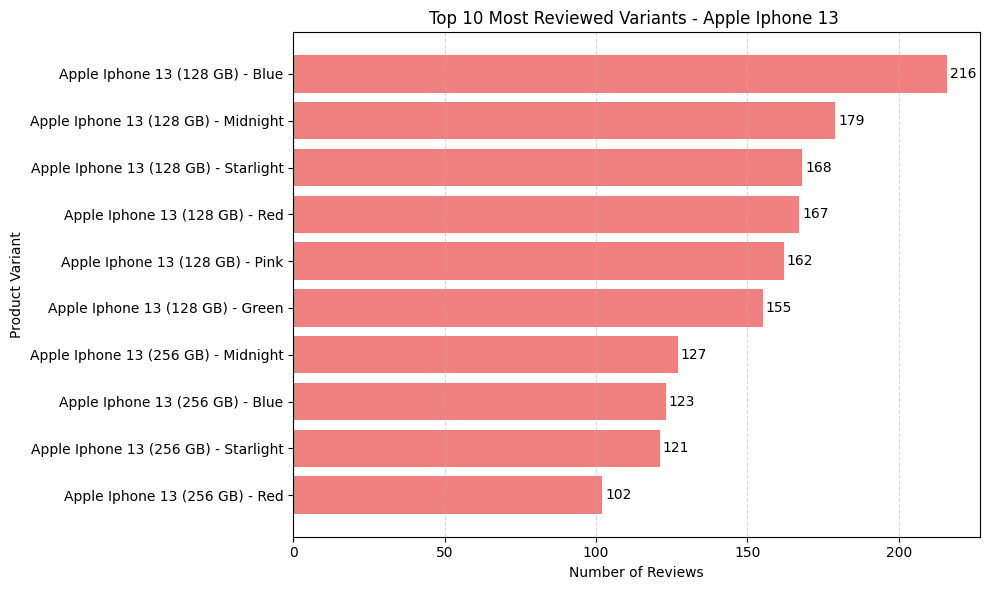

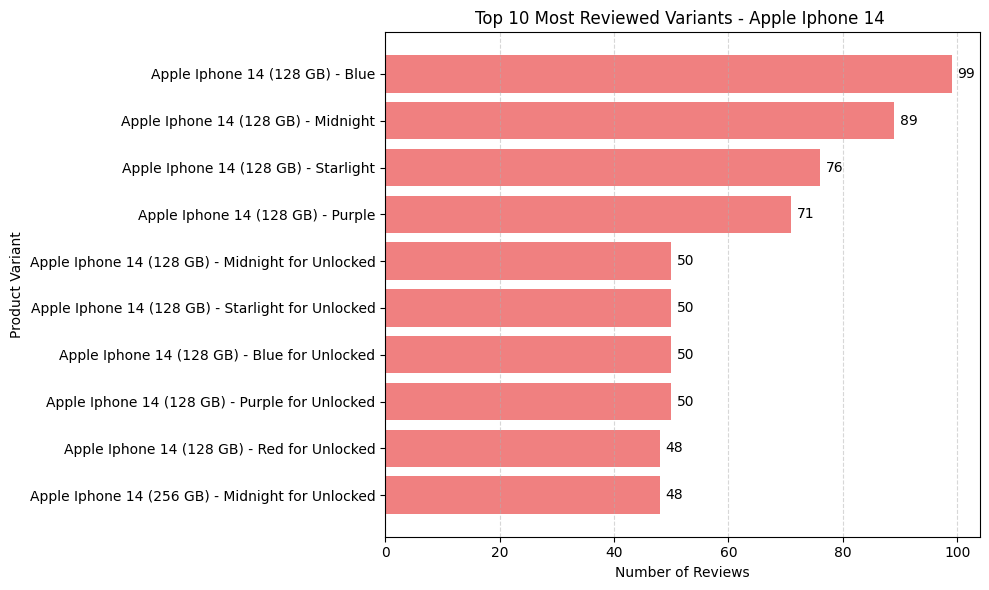

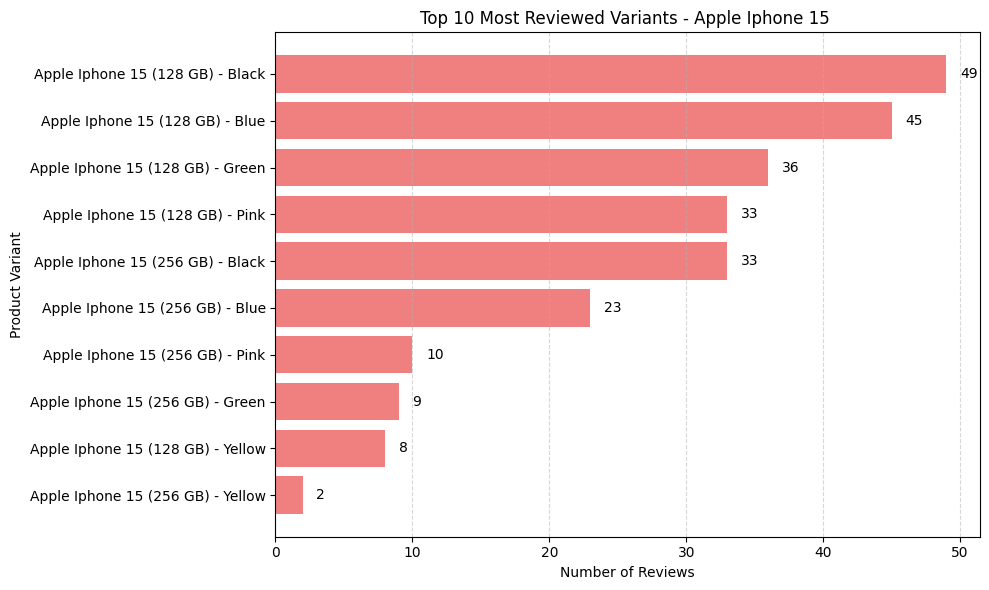

In [ ]:
# Filter
reviewed_df = df[df["reviewDescription"].notna() & df["reviewDescription"].str.strip().ne("")]

# Tentukan urutan productType
ordered_product_types = ["Apple Iphone 13 ", "Apple Iphone 14 ", "Apple Iphone 15 "]

# Loop untuk setiap productType dalam urutan yang ditentukan
for p_type in ordered_product_types:
    if p_type not in reviewed_df["productType"].unique():
        continue

    subset = reviewed_df[reviewed_df["productType"] == p_type]


    review_counts = (
        subset.groupby("productVariant")
        .size()
        .reset_index(name="reviewCount")
        .sort_values(by="reviewCount", ascending=False)
    )

    # Ambil 10 varian teratas
    top_variants = review_counts.head(10)

    plt.figure(figsize=(10, 6))
    bars = plt.barh(top_variants["productVariant"], top_variants["reviewCount"], color='lightcoral')


    for bar in bars:
        width = bar.get_width()
        plt.text(width + 1, bar.get_y() + bar.get_height() / 2,
                 str(width), va='center')

    plt.xlabel("Number of Reviews")
    plt.ylabel("Product Variant")
    plt.title(f"Top 10 Most Reviewed Variants - {p_type}")
    plt.gca().invert_yaxis() 
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


Berdasarkan plot di atas, iPhone 13 yang paling banyak di review adalah dengan varian (128 GB) - Blue (216 review), iPhone 14 yang paling banyak di review adalah dengan varian (128 GB) - Blue, iPhone 15 yang paling banyak di review adalah dengan varian (128 GB) - Black.

## Rating Distribution 1, 3, 5 each Product Type

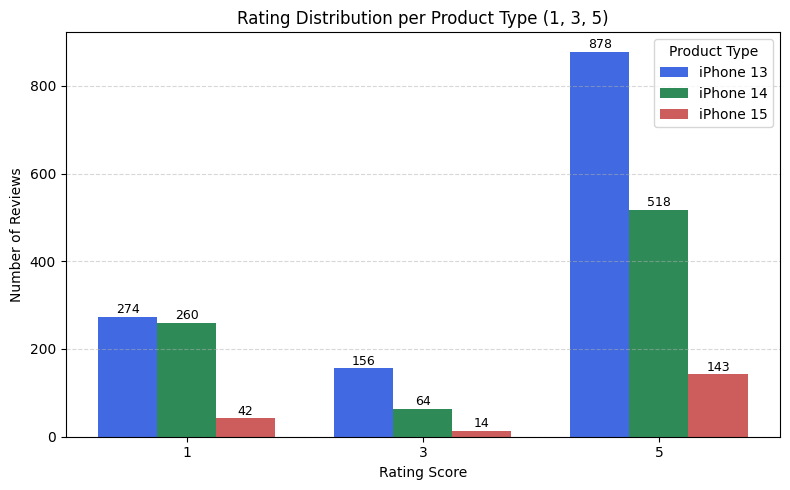

In [ ]:
reviewed_df = df[
    df["reviewDescription"].notna() &
    df["reviewDescription"].str.strip().ne("") &
    df["ratingScore"].notna()
].copy()

reviewed_df["ratingScore"] = reviewed_df["ratingScore"].astype(int)

# Keyword pencarian dan rating
iphone_keywords = ["iPhone 13", "iPhone 14", "iPhone 15"]
target_ratings = [1, 3, 5]

# Simpan data hasil
rating_data = {}

for keyword in iphone_keywords:
    subset = reviewed_df[
        reviewed_df["productType"].str.contains(keyword, case=False, na=False) &
        reviewed_df["ratingScore"].isin(target_ratings)
    ]

    counts = (
        subset["ratingScore"]
        .value_counts()
        .reindex(target_ratings, fill_value=0)
        .sort_index()
        .tolist()
    )
    rating_data[keyword] = counts

# Bar Chart
x = np.arange(len(target_ratings))  # [0, 1, 2]
bar_width = 0.25

fig, ax = plt.subplots(figsize=(8, 5))

colors = ['royalblue', 'seagreen', 'indianred']

for i, (model, counts) in enumerate(rating_data.items()):
    bar_positions = x + i * bar_width
    bars = ax.bar(bar_positions, counts, width=bar_width, label=model, color=colors[i])
    

    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height + 1,
                str(height),
                ha='center',
                va='bottom',
                fontsize=9
            )

# Labels
ax.set_xticks(x + bar_width)
ax.set_xticklabels([str(r) for r in target_ratings])
ax.set_xlabel("Rating Score")
ax.set_ylabel("Number of Reviews")
ax.set_title("Rating Distribution per Product Type (1, 3, 5)")
ax.legend(title="Product Type")
ax.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Berdasarkan chart, setiap tipe iPhone paling banyak mendapat review dengan rating 5 (Excellent), diikuti oleh rating 1 (Poor) dan 3 (Neutral). Hal ini menunjukkan bahwa sebagian besar pengguna merasa puas dengan produk iPhone.

## Top 5 Words Showed at Rating 1, 3, 5

In [ ]:
df_filtered = df[df['reviewDescription_cleaned'].notna()]

def get_top_words(data, top_n=5):
    words = []
    for text in data:
        tokens = re.findall(r'\b\w+\b', text.lower())
        words.extend(tokens)
    return Counter(words).most_common(top_n)

# Ambil top 5 kata untuk setiap rating 1, 3, dan 5
top_words_by_rating = {}

for rating in [1, 3, 5]:
    reviews = df_filtered[df_filtered['ratingScore'] == rating]['reviewDescription_cleaned']
    top_words = get_top_words(reviews)
    # Simpan hanya kata-nya
    top_words_by_rating[rating] = [word for word, count in top_words]


top_words_df = pd.DataFrame.from_dict(top_words_by_rating, orient='index').transpose()
top_words_df.columns = [f'Rating {col}' for col in top_words_df.columns]

top_words_df


,Rating 1,Rating 3,Rating 5
0,apple,battery,good
1,buy,good,battery
2,battery,camera,camera
3,service,android,great
4,camera,apple,new


## Camera, Battery, Display Distribution Rating 1, 3, 5 per Product Type

### iPhone 13

In [ ]:
# Filter hanya untuk iPhone 14
df_filtered_13 = df[
    df['reviewDescription_cleaned'].notna() &
    df['productType'].isin(["Apple Iphone 13 "])
]

# Target kata yang ingin dianalisis
keywords = ['camera', 'battery', 'display']

result = {}

for rating in [1, 3, 5]:
    rating_df = df_filtered_13[df_filtered_13['ratingScore'] == rating]
    text_series = rating_df['reviewDescription_cleaned'].str.lower()

    keyword_counts = {}
    for keyword in keywords:
        count = text_series.str.count(rf'\b{keyword}\b').sum()
        keyword_counts[keyword] = count

    result[rating] = keyword_counts


distribution_df_13 = pd.DataFrame(result).T
distribution_df_13.index.name = 'Rating'

distribution_df_13

,camera,battery,display
Rating,,,
1,48,48,12
3,58,89,22
5,237,226,107


[Berdasarkan tabel di atas, fitur *camera*, *battery*, dan *display* paling banyak dengan rating 5, diikuti oleh rating 3 dan 1. Hal ini mengindikasikan bahwa user iPhone 13 cenderung memberikan penilaian positif terhadap ketiga fitur tersebut.](https://www.bajajfinserv.in/iphone-13-vs-iphone-14-vs-iphone-15)

### iPhone 14

In [ ]:
# Filter hanya untuk iPhone 13
df_filtered_14 = df[
    df['reviewDescription_cleaned'].notna() &
    df['productType'].isin(["Apple Iphone 14 "])
]

# Target kata yang ingin dianalisis
keywords = ['camera', 'battery', 'display']


result = {}

for rating in [1, 3, 5]:
    rating_df = df_filtered_14[df_filtered_14['ratingScore'] == rating]
    text_series = rating_df['reviewDescription_cleaned'].str.lower()

    keyword_counts = {}
    for keyword in keywords:
        count = text_series.str.count(rf'\b{keyword}\b').sum()
        keyword_counts[keyword] = count

    result[rating] = keyword_counts


distribution_df_14 = pd.DataFrame(result).T
distribution_df_14.index.name = 'Rating'

distribution_df_14

,camera,battery,display
Rating,,,
1,35,40,9
3,15,28,2
5,61,120,9


[Berdasarkan tabel di atas, fitur *camera* dan *battery* paling banyak disebut pada ulasan dengan rating 5, diikuti oleh rating 1 dan 3. Sementara itu, fitur *display* memiliki jumlah penyebutan yang sama pada rating 1 dan 3, serta lebih rendah pada rating 5. Hal ini mengindikasikan bahwa user iPhone 14 umumnya puas terhadap fitur *camera* dan *battery*, namun memiliki penilaian yang lebih beragam terhadap fitur *display*.](https://www.bajajfinserv.in/iphone-13-vs-iphone-14-vs-iphone-15)


### iPhone 15

In [ ]:
# Filter hanya untuk iPhone 14
df_filtered_15 = df[
    df['reviewDescription_cleaned'].notna() &
    df['productType'].isin(["Apple Iphone 15 "])
]

# Target kata yang ingin dianalisis
keywords = ['camera', 'battery', 'display']


result = {}

for rating in [1, 3, 5]:
    rating_df = df_filtered_15[df_filtered_15['ratingScore'] == rating]
    text_series = rating_df['reviewDescription_cleaned'].str.lower()

    keyword_counts = {}
    for keyword in keywords:
        count = text_series.str.count(rf'\b{keyword}\b').sum()
        keyword_counts[keyword] = count

    result[rating] = keyword_counts


distribution_df_15 = pd.DataFrame(result).T
distribution_df_15.index.name = 'Rating'

distribution_df_15

,camera,battery,display
Rating,,,
1,5,11,1
3,2,5,0
5,40,42,12


[Berdasarkan tabel di atas, fitur *camera*, *battery*, dan *display* paling banyak disebut pada ulasan dengan rating 5, diikuti oleh rating 1 dan 3. Hal ini mengindikasikan bahwa user iPhone 15 memiliki penilaian yang lebih beragam.](https://www.bajajfinserv.in/iphone-13-vs-iphone-14-vs-iphone-15)
